In [119]:
%pylab inline
import seaborn as sns
sns.set_style('white')
sns.set_context('paper', font_scale=2.5)
from pomegranate import HiddenMarkovModel, NormalDistribution, PoissonDistribution
model = HiddenMarkovModel()


Populating the interactive namespace from numpy and matplotlib


In [5]:
binned_spikes = np.load('/home/saket/Downloads/binned_spikes.npy')
binned_spikes.shape

(10, 250, 27)

In [13]:
lambdas = [4, 10]
N = 10
X_T = np.array([np.random.poisson(lam, size=N) for lam in lambdas])
X_T.shape

(2, 10)

In [48]:
#lambdas = [4, 10]
#N = 10

def generate_X():
    lambdas = [4, 10]
    N = 10

    X_T = list(np.random.poisson(lambdas[0], size=N))
    X_T += list(np.random.poisson(lambdas[1], size=1))
    X_T += list(np.random.poisson(lambdas[0], size=int(N/2)))
    X_T += list(np.random.poisson(lambdas[1], size=1))
    Y_T = [0]*N + [1] + [0]*int(N/2) + [1]  
    return X_T, Y_T
    #X_T = np.array(X_T).reshape(len(X_T),1)
#X_T.shape
X = []
Y = []
n_samples = 10
for n in range(n_samples):
    x, y = generate_X()
    X.append(x)
    Y.append(y)
X= np.array(X)
X.shape

(10, 17)

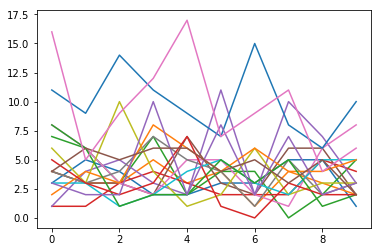

In [49]:
plt.plot(X)

In [19]:
from pomegranate import *
import numpy as np

model = HiddenMarkovModel('%i' % 1) 
states = []
n_states = 1


for i in range(n_states):
	states.append(State(IndependentComponentsDistribution([PoissonDistribution(np.random.rand()) for unit in range(binned_spikes.shape[2])]), name = 'State%i' % (i+1)))
	
model.add_states(states)

for i in range(n_states):
	if i == 0:
		model.add_transition(model.start, states[i], 1.0)
	else:
		model.add_transition(model.start, states[i], 0.0)

for i in range(n_states):
	not_transitioning_prob = (0.999-0.95)*np.random.random() + 0.95
	for j in range(n_states):
		if i - j == 0:
			model.add_transition(states[i], states[j], not_transitioning_prob)
		elif j - i == 1:
			model.add_transition(states[i], states[j], 1.0 - not_transitioning_prob)
		else:
			model.add_transition(states[i], states[j], 0.0) 
	
model.bake()


model.dense_transition_matrix()


array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 0.]])

In [22]:
trans_mat = numpy.array([[0.7, 0.3],
                         [0.3, 0.7]])
starts = numpy.array([0.5, 0.0])
ends = numpy.array([0.0, 0.1])
dists = [PoissonDistribution(2), PoissonDistribution(3)]

model = HiddenMarkovModel.from_matrix(trans_mat, dists, starts, ends)

In [121]:
model = HiddenMarkovModel.from_samples(PoissonDistribution, n_components=2, 
                                       X=X,
                                       algorithm='baum-welch',
                                       state_names=['normal', 'stalling'],
                                       verbose=True)
model.bake()

[1] Improvement: 26.663072218839204	Time (s): 0.0002174
[2] Improvement: 1.0303674970031125	Time (s): 0.00052
[3] Improvement: 0.6115659918766596	Time (s): 0.0003312
[4] Improvement: 0.44279456991080224	Time (s): 0.0003188
[5] Improvement: 0.34550262243874386	Time (s): 0.000345
[6] Improvement: 0.27821388423990356	Time (s): 0.0003171
[7] Improvement: 0.22557641760477054	Time (s): 0.0003307
[8] Improvement: 0.1820842809208898	Time (s): 0.0003078
[9] Improvement: 0.1458413473354767	Time (s): 0.0003068
[10] Improvement: 0.11595710218421118	Time (s): 0.0003057
[11] Improvement: 0.09167178510375606	Time (s): 0.0003288
[12] Improvement: 0.07218594497607	Time (s): 0.0003092
[13] Improvement: 0.05669975193455912	Time (s): 0.0003049
[14] Improvement: 0.04447384685738598	Time (s): 0.0003052
[15] Improvement: 0.03486418377354994	Time (s): 0.000303
[16] Improvement: 0.027331563368932166	Time (s): 0.0003171
[17] Improvement: 0.021436118841620555	Time (s): 0.0003107
[18] Improvement: 0.0168250821639

In [76]:
model.predict(X[6,:])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1]

In [123]:
def _plot_X(index, ax):
    markerline, stemlines, baseline = ax.stem(range(1, len(X[index,:])+1), X[index,:], '-')
    # setting property of baseline with color red and linewidth 2
    #_ann(markerline, stemlines, baseline)
    _ = plt.setp(stemlines, color='b', linewidth=2)
    _ = plt.setp(stemlines[10], color='r', linewidth=2)
    _ = plt.setp(stemlines[16], color='r', linewidth=2)
    _ = plt.setp(markerline, color='b', linewidth=2)
    _ = plt.setp(baseline, color='w', linewidth=2)
    
def _mark_states(index, ax):
    prediction = np.array(model.predict(X[index,:]))
    markerline, stemlines, baseline = ax.stem(range(1, len(X[0,:])+1), prediction, '-')
    _ = plt.setp(stemlines, color='b', linewidth=2)
    for x in np.where(prediction==1)[0]:
        _ = plt.setp(stemlines[x], color='r', linewidth=2)
    _ = plt.setp(markerline, color='b', linewidth=2)
    _ = plt.setp(baseline, color='w', linewidth=2)

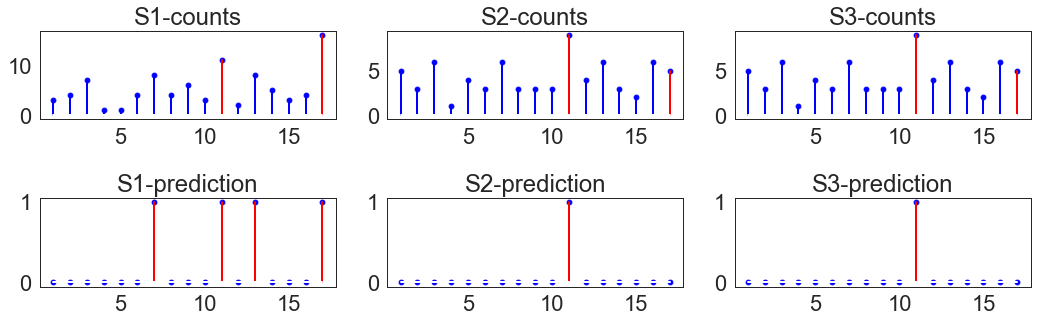

In [130]:
fig = plt.figure(figsize=(15, 5))
ax = plt.subplot(231)
ax.set_title('S1-counts')
_plot_X(0, ax)
ax = plt.subplot(234)
ax.set_title('S1-prediction')
_mark_states(0, ax)

ax = plt.subplot(232)
ax.set_title('S2-counts')
_plot_X(1, ax)
ax = plt.subplot(235)
ax.set_title('S2-prediction')
_mark_states(1, ax)

ax = plt.subplot(233)
ax.set_title('S3-counts')
_plot_X(1, ax)
ax = plt.subplot(236)
ax.set_title('S3-prediction')
_mark_states(1, ax)
fig.tight_layout()
fig.savefig('./poisson_hmm.pdf')

In [97]:
x

array([ 6, 10, 12, 16])

In [23]:
model.fit(X_T[0], algorithm = 'baum-welch', min_iterations = 10, max_iterations = 10, verbose = True)


[1] Improvement: 28.630255148194124	Time (s): 0.0001838
[2] Improvement: 1.849677236425869	Time (s): 0.0004764
[3] Improvement: 0.9042281453633834	Time (s): 0.0003605
[4] Improvement: 0.29265315082331256	Time (s): 0.000571
[5] Improvement: 0.09268132273710705	Time (s): 0.0001519
[6] Improvement: 0.02668330529071028	Time (s): 0.0001123
[7] Improvement: 0.007185721437707571	Time (s): 0.0001051
[8] Improvement: 0.0018950440458738171	Time (s): 0.0008717
[9] Improvement: 0.0004969385193192011	Time (s): 0.0003617
[10] Improvement: 0.00013011720595557108	Time (s): 0.0003211
Total Training Improvement: 31.805886130043362
Total Training Time (s): 0.0051


{
    "class" : "HiddenMarkovModel",
    "name" : "None",
    "start" : {
        "class" : "State",
        "distribution" : null,
        "name" : "None-start",
        "weight" : 1.0
    },
    "end" : {
        "class" : "State",
        "distribution" : null,
        "name" : "None-end",
        "weight" : 1.0
    },
    "states" : [
        {
            "class" : "State",
            "distribution" : {
                "class" : "Distribution",
                "name" : "PoissonDistribution",
                "parameters" : [
                    3.443460502751991
                ],
                "frozen" : false
            },
            "name" : "s0",
            "weight" : 1.0
        },
        {
            "class" : "State",
            "distribution" : {
                "class" : "Distribution",
                "name" : "PoissonDistribution",
                "parameters" : [
                    7.931120040335618
                ],
                "frozen" : false
         

In [33]:
print("\n".join( "{}: {}".format( state.name, state.distribution ) 	for state in model.states if not state.is_silent() ))


normal: {
    "class" :"Distribution",
    "name" :"PoissonDistribution",
    "parameters" :[
        3.0000000000000764
    ],
    "frozen" :false
}
stalling: {
    "class" :"Distribution",
    "name" :"PoissonDistribution",
    "parameters" :[
        8.399999999495781
    ],
    "frozen" :false
}
